In [1]:
from audio import *

In [98]:
from fastai.tabular import *
import os
from fastai import *
from pyts.image import GramianAngularField

os.environ["TORCH_HOME"] = "/media/subhaditya/DATA/COSMO/Datasets-Useful"

# Preparing data

In [331]:
data = pd.read_csv("data/subset_csv.csv", header=0)
data = data.drop(["Unnamed: 0"], axis=1)

In [332]:
data = data.drop("0.1", axis=1)

In [333]:
data = data.fillna(0)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,403,404,405,406,407,408,409,410,411,412
0,Ambulance,4294.871795,4291.794872,4294.358974,4298.461538,4292.820513,4278.974359,4276.410256,4288.205128,4291.282051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Ambulance,4272.307692,4274.871795,4266.153846,4262.051282,4254.358974,4251.282051,4264.102564,4250.769231,4244.102564,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Ambulance,4209.230769,4217.435897,4197.435897,4180.000000,4194.871795,4205.641026,4197.435897,4201.025641,4202.564103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ambulance,4287.692308,4294.358974,4312.820513,4309.743590,4288.717949,4295.384615,4313.846154,4301.538462,4288.717949,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Ambulance,4324.102564,4311.794872,4287.692308,4289.230769,4304.615385,4295.897436,4290.769231,4322.564103,4334.871795,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [334]:
data = data[data.columns[:392]]

In [335]:
classes = list(data["0"].unique())
classes

['Ambulance',
 'Flamingo',
 'Football',
 'Kite',
 'Mushroom',
 'Orange',
 'Stethescope',
 'Strawberry',
 'Toaster',
 'Zebra']

In [336]:
data.loc[0][1:391].values

array([4294.8717948718, 4291.79487179487, 4294.35897435897, 4298.46153846154, ..., 0.0, 0.0, 0.0, 0.0], dtype=object)

In [337]:
data.loc[0][0]

'Ambulance'

In [338]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler((-1,1))

In [339]:
def fix_ar(dat):
    temp = np.array(list(filter((0.0).__ne__, dat)), dtype=np.float32)
    return min_max_scaler.fit_transform(temp.reshape(-1,1))

In [340]:
data.shape

(238, 392)

In [341]:
X_gadf = GramianAngularField(128, method="difference")

In [342]:
x = fix_ar(data.loc[0][1::].values).flatten()

In [343]:
x.shape

(380,)

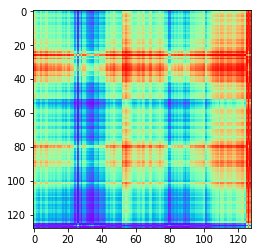

In [344]:
x = x.reshape(1, *x.shape)
lol = X_gadf.transform(x)
plt.imshow(lol.squeeze(), cmap="rainbow")

(4200, 4500)

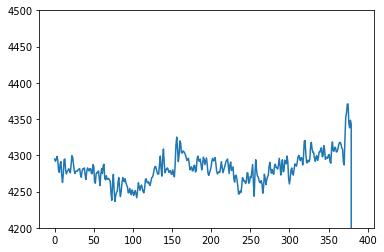

In [345]:
plt.plot(data.loc[0][1:391].values)
plt.ylim(4200, 4500)

In [346]:
data.shape

(238, 392)

In [347]:
import tqdm

In [348]:
# for row in tqdm.tqdm(range(data.shape[0])):
#     temp = data.loc[row]
#     librosa.output.write_wav(
#         ,
#         sr,norm = False
#     )

In [349]:
path = Path("dataaudio")

100%|██████████| 238/238 [00:12<00:00, 18.65it/s]


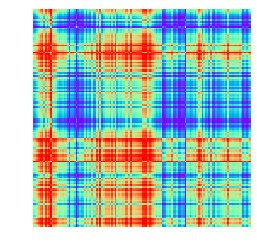

In [350]:
for row in tqdm.tqdm(range(data.shape[0])):
    temp = data.loc[row]
    #     print(temp)
    x = fix_ar(temp[1::].values).flatten()
    x = x.reshape(1, *x.shape)
    lol = X_gadf.transform(x)
    plt.cla()
    plt.clf()
    plt.axis("off")
    plt.imshow(lol.squeeze(), cmap="rainbow")

    #     print(str(path / temp[0] / f"{str(row)}.png"))
    #     break
    plt.savefig(str(path / temp[0] / f"{str(row)}.png"))

# Fastai - images

In [168]:
from fastai import *
from fastai.vision import *
import torch.onnx
from torch.autograd import Variable
import os
from torch.optim import *

os.environ["TORCH_HOME"] = "/media/subhaditya/DATA/COSMO/Datasets-Useful"

In [351]:
path = Path("dataaudio")

In [352]:
data = (
    (
        ImageList.from_folder(path)
        .split_by_rand_pct()
        .label_from_folder()
        .transform(None, size=128)
    )
    .databunch(bs=64)
    .normalize(imagenet_stats)
)

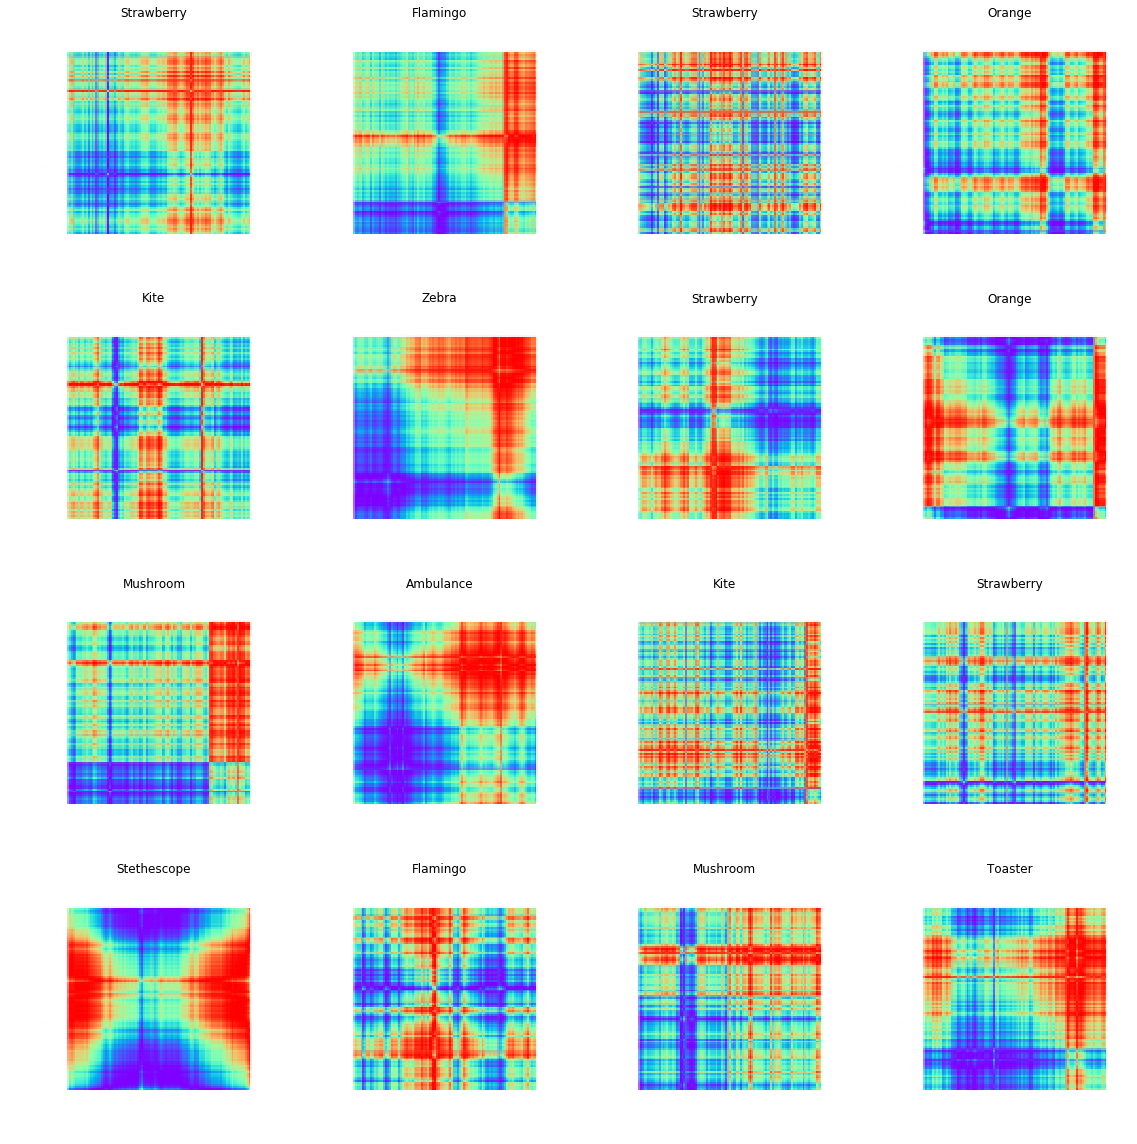

In [353]:
data.show_batch(4)

In [354]:
data.c

10

(array([18., 21., 19., 28., 18., 18., 16., 20., 19., 14.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

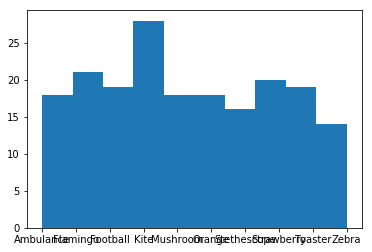

In [355]:
class_sam = [str(x) for x in data.train_ds.y]
plt.hist(class_sam)

In [356]:
learn = None
gc.collect()

Exception ignored in: Traceback (most recent call last):
  File "/home/subhaditya/anaconda3/lib/python3.7/multiprocessing/queues.py", line 232, in _feed
    close()
  File "/home/subhaditya/anaconda3/lib/python3.7/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/home/subhaditya/anaconda3/lib/python3.7/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor
<function _ConnectionBase.__del__ at 0x7fe5ac8900e0>
Traceback (most recent call last):
  File "/home/subhaditya/anaconda3/lib/python3.7/multiprocessing/connection.py", line 132, in __del__
    self._close()
  File "/home/subhaditya/anaconda3/lib/python3.7/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor


122

In [357]:
from fastai.callbacks import OverSamplingCallback
from torch.optim import *

In [361]:
learn = cnn_learner(
    data, models.resnet101, metrics=[accuracy], callback_fns=[ShowGraph],pretrained = False
).to_fp16()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


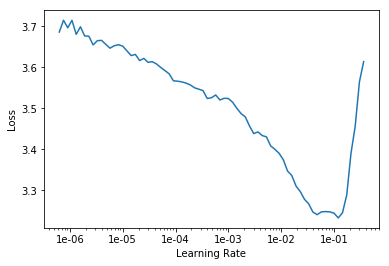

In [362]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,3.908804,2.304923,0.063830,00:02
1,3.745535,2.414672,0.021277,00:02
2,3.625190,2.409242,0.106383,00:01
3,3.560643,2.400879,0.085106,00:02
4,3.479866,2.687283,0.127660,00:01
5,3.360003,2.920098,0.127660,00:02
6,3.322742,507.886963,0.127660,00:02
7,3.235260,nan,0.085106,00:02
8,3.152510,nan,0.148936,00:02


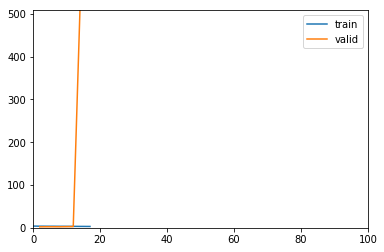

KeyboardInterrupt: 

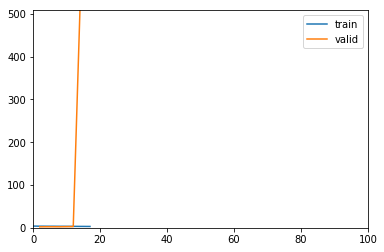

In [363]:
learn.unfreeze()
learn.fit_one_cycle(50, 1e-2,wd = 1e-4)

In [214]:
learn.save('stag-1')

epoch,train_loss,valid_loss,accuracy,time
0,3.405414,79.701195,0.148936,00:02
1,3.705653,250.055023,0.063830,00:02


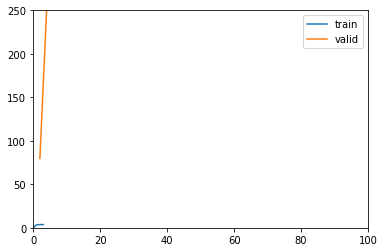

KeyboardInterrupt: 

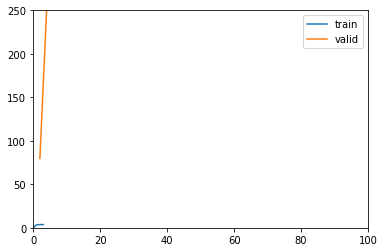

In [215]:
learn.unfreeze()
learn.fit_one_cycle(50, 3e-2)

In [ ]:
learn.show_results()

# Librosa - fail

In [13]:
sr = 10

In [190]:
path = Path("dataaudio/")

In [189]:
import tqdm
import matplotlib.pyplot as plt
from librosa.display import specshow

In [123]:
for row in tqdm.tqdm(range(data.shape[0])):
    temp = data.loc[row]
    librosa.output.write_wav(
        path / temp[0] / f"{str(row)}.wav",
        np.array(temp[1::].values, dtype=np.float32),
        sr,
        norm=False,
    )

100%|██████████| 238/238 [00:01<00:00, 222.60it/s]


In [124]:
y, sr = librosa.load(path / "Flamingo/45.wav", sr=10)

In [125]:
y, len(y)

(array([4284.1025, 4284.1025, 4288.718 , 4292.8203, ...,    0.    ,    0.    ,    0.    ,    0.    ], dtype=float32),
 412)

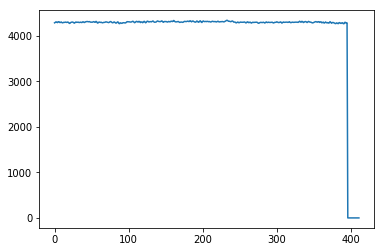

In [162]:
plt.plot(y)

In [126]:
S = librosa.feature.melspectrogram(y=y, sr=sr)

In [154]:
mfccs = librosa.feature.mfcc(y=y, sr=10, n_mfcc=5)

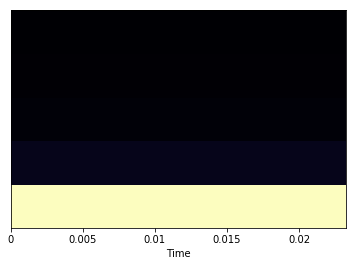

In [155]:
librosa.display.specshow(mfccs, x_axis="time")

In [156]:
y, sr = librosa.load(path / "Toaster/194.wav", sr=10)

In [157]:
y, len(y)

(array([4281.026 , 4290.2563, 4303.59  , 4293.3335, ...,    0.    ,    0.    ,    0.    ,    0.    ], dtype=float32),
 412)

In [158]:
S = librosa.feature.melspectrogram(y=y, sr=sr)

In [159]:
mfccs = librosa.feature.mfcc(y=y, sr=10, n_mfcc=5)

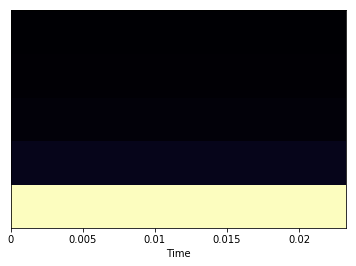

In [160]:
librosa.display.specshow(mfccs, x_axis="time")

# Fastai RNN?

In [73]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from fastai.tabular import *
import os
from fastai import *

os.environ["TORCH_HOME"] = "/media/subhaditya/DATA/COSMO/Datasets-Useful"

In [38]:
data = pd.read_csv("data/subset_csv.csv", header=0)
data = data.drop(["Unnamed: 0"], axis=1)

In [39]:
data = data.drop("0.1", axis=1)

In [40]:
data = data.fillna(0)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,403,404,405,406,407,408,409,410,411,412
0,Ambulance,4294.871795,4291.794872,4294.358974,4298.461538,4292.820513,4278.974359,4276.410256,4288.205128,4291.282051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Ambulance,4272.307692,4274.871795,4266.153846,4262.051282,4254.358974,4251.282051,4264.102564,4250.769231,4244.102564,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Ambulance,4209.230769,4217.435897,4197.435897,4180.000000,4194.871795,4205.641026,4197.435897,4201.025641,4202.564103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ambulance,4287.692308,4294.358974,4312.820513,4309.743590,4288.717949,4295.384615,4313.846154,4301.538462,4288.717949,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Ambulance,4324.102564,4311.794872,4287.692308,4289.230769,4304.615385,4295.897436,4290.769231,4322.564103,4334.871795,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# data = data[data.columns[:392]]

In [42]:
classes = list(data["0"].unique())
classes

['Ambulance',
 'Flamingo',
 'Football',
 'Kite',
 'Mushroom',
 'Orange',
 'Stethescope',
 'Strawberry',
 'Toaster',
 'Zebra']

In [43]:
data.shape

(238, 413)

In [44]:
procs = [FillMissing, Categorify, Normalize]

valid_idx = range(len(data) - 50, len(data))

In [45]:
dep_var = "0"
cat_names = "0"

In [46]:
for a in cat_names:
    data[a] = data[a].astype("category").cat.codes

In [47]:
path = Path(".")

In [61]:
datab = TabularDataBunch.from_df(
    path,
    data,
    dep_var,
    valid_idx=valid_idx,
    procs=procs,
    classes=[x for x in range(0, 10)],
)

In [82]:
class LSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()

        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length

        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
        )

        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, y, x):
        #         print(x, y)
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)).to(
            "cuda"
        )

        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)).to(
            "cuda"
        )

        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))

        h_out = h_out.view(-1, self.hidden_size)

        out = self.fc(h_out)

        return out

In [83]:
input_size = 1
hidden_size = 512
num_layers = 1

num_classes = 10
seq_length = 5
lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

In [87]:
learn = tabular_learner(datab, layers=[200, 100], metrics=accuracy).to_fp16()

In [89]:
learn.fit_one_cycle(10, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.128739,2.331996,0.000000,00:00
1,2.017305,2.356579,0.000000,00:00
2,1.901326,2.497976,0.000000,00:00
3,1.844328,2.431185,0.040000,00:00
4,1.756102,2.510618,0.000000,00:00
5,1.654674,2.716362,0.020000,00:00
6,1.563483,2.893872,0.020000,00:00
7,1.488083,3.011905,0.000000,00:00
8,1.392874,3.087542,0.020000,00:00
9,1.318635,3.120924,0.020000,00:00
